# Project Introduction
#1 Our goal is to explore the trend variation on the bitcoin market price based on the market news and social news.
#2 The first raw data we crawled from website is mainly from cryptocurrencynews.com. It has already done in the data_collect.ipynb progress in the same directory in the github. Now we would directly use the stored data in <b>cryptocurrencynews_com_bitcoin_news.csv</b> file

#### Changes to the project
1> Our goal remains, but the source of the data changed.

Previously we would want to get data from mediacloud.com website. Later on we found that such data is not in accordance with our goal to use the contents to judge the market price variation. So we changed our way to re-crawled the data from the main cryptocurrency market news websites and social medias, like tweets. It tempted to be slow.

2> to be continued.

In [114]:
# Pre import
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import csv

# Data Cleaning= Preprocessing the Raw data
2.1 format transformation

2.2 create labels

2.3 merge news data with price data

In [95]:
# Read 'Bitcoin' and the pricing of 'Bitcoin' market
priceOfBitcoin = pd.read_csv('bitcoin-24hv0.csv')
newsOfBitcoin = pd.read_csv('cryptocurrencynews_with_years.csv')

### 2.1 Date tranformation

In [96]:
priceOfBitcoin.rename(columns={'Series 1':'price', 'DateTime':'date'}, inplace=True)
priceOfBitcoin['date'] = [x[:10] for x in priceOfBitcoin['date']]
priceOfBitcoin['date'] = priceOfBitcoin['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
priceOfBitcoin.head()

,date,price
0,2013-04-28,135.30
1,2013-04-29,134.44
2,2013-04-30,144.00
3,2013-05-01,139.00
4,2013-05-02,116.38


In [97]:
# Read from cryptocurrencynews_com_bitcoin_news.csv
newsOfBitcoin['date'] = [x+'-'+y for x,y in zip(newsOfBitcoin['date'],newsOfBitcoin['year'].apply(str))]
newsOfBitcoin['date'] = newsOfBitcoin['date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%Y'))
newsOfBitcoin.rename(columns={'title':'text'}, inplace=True)
newsOfBitcoin.head()

,text,date,year
0,Bitcoin Price is in the Green but EOS is Today...,2019-04-10,2019
1,Chinese Investors Jump on Bitcoin’s Bull Trend...,2019-04-09,2019
2,PayPal Makes Blockchain Investment in Cambridg...,2019-04-02,2019
3,Square is Hiring: You Can Be Paid in Bitcoin i...,2019-03-21,2019
4,Apple’s Steve Wozniak Says Bitcoin has “Massiv...,2019-02-27,2019


### 2.2 Label the data

In [98]:
priceOfBitcoin['price2'] = [x for x in priceOfBitcoin['price'][1:]] + [0.0]
# we add a new column 'Rising' to determine if the price is rising than previous day's price
# 1: means rising, 0: means non rising
# priceOfBitcoin['Rising']
priceOfBitcoin['trend'] = priceOfBitcoin['price'] < priceOfBitcoin['price2']
priceOfBitcoin['label'] = [int(x) for x in priceOfBitcoin['trend']]
priceOfBitcoin.drop(columns=['trend'],inplace=True)
priceOfBitcoin.head()

,date,price,price2,label
0,2013-04-28,135.30,134.44,0
1,2013-04-29,134.44,144.00,1
2,2013-04-30,144.00,139.00,0
3,2013-05-01,139.00,116.38,0
4,2013-05-02,116.38,106.25,0


### 2.3 Merge the dataset with price and news

In [122]:
df = priceOfBitcoin.merge(newsOfBitcoin, how = 'inner', left_on='date', right_on='date')
df = df[['label','text']]
df.head()

,label,text
0,1,A Potential Reason Behind Bitcoin’s Surge
1,1,Bitcoin Just A Bubble? Credit Suisse CEO’s Pre...
2,1,"BREAKING: Bitcoin Soars 6% to $7,400 in just 2..."
3,1,Can You Make a Fortune out of Bitcoin? Richard...
4,0,"Hard Fork News: Bitcoin SegWit2x Suspended, Pr..."


In [119]:
df.to_csv('tmp/bitcoin_news_price.csv', sep=',', index = False)

### 3 EDA visulization

Because currently our text data would contains so many features(words), it's difficult to draw a hyper-spherical graph here. So we mainly plot the picture based on the mention times(occurrence) of bitcoin in the media news and the market price data.

1,explain what your data looks like (words are fine, but
visualizations are often better). Include any interesting issues or preliminary
conclusions you have about your data.

2,that tests an interesting hypothesis, along with an
explanation about why you thought this was an interesting hypothesis to
investigate.

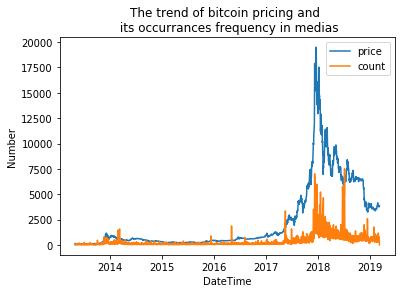

In [138]:
priceOfBitcoin2 = pd.read_csv('bitcoin-24hv0.csv')
priceOfBitcoin2.rename(columns={'Series 1':'price', 'DateTime':'date'}, inplace=True)
# print(priceOfBitcoin2.head())
# count of bitcoin occurrances in medias
daily_bitcoin_count = pd.read_csv('tmp/daily_bitcoin_count.csv')
# print(daily_bitcoin_count.head())
daily_bitcoin_pricing_count = pd.merge(priceOfBitcoin2, daily_bitcoin_count, 
                                       how='inner', left_on='date', right_on='date')
# print(daily_bitcoin_pricing_count.head())
daily_bitcoin_pricing_count['DateTime'] = [x[:10] for x in daily_bitcoin_pricing_count['date']]
daily_bitcoin_pricing_count['day'] = [x[8:10] for x in daily_bitcoin_pricing_count['date']]
daily_bitcoin_pricing_count['month'] = [x[5:7] for x in daily_bitcoin_pricing_count['date']]
daily_bitcoin_pricing_count['year'] = [x[0:4] for x in daily_bitcoin_pricing_count['date']]
daily_bitcoin_pricing_count['DateTime'] = pd.to_datetime(daily_bitcoin_pricing_count['date'])

fig, ax = plt.subplots()
plt.plot('DateTime', 'price', label='price', data=daily_bitcoin_pricing_count)
plt.plot('DateTime', 'count', label='count', data=daily_bitcoin_pricing_count)
plt.xlabel('DateTime')
plt.ylabel('Number')
plt.title('The trend of bitcoin pricing and \n its occurrances frequency in medias')
plt.legend()
plt.show()
fig.savefig('Bitcoin_Price_And_Occurencies.png', dpi=300)

#### 3.1 Normalization

/Users/dahang/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/dahang/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


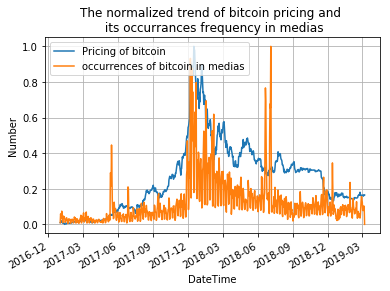

In [140]:
# Normalized Plotting
from matplotlib import dates as mdates
df = daily_bitcoin_pricing_count.copy()
daily_bitcoin_pricing_count_norm = df[df['DateTime'] >= '2017-01-01']

pricing_series = daily_bitcoin_pricing_count_norm['price'];
min_price = min(pricing_series)
max_price = max(pricing_series)

count_series = daily_bitcoin_pricing_count_norm['count'];
min_count = min(count_series)
max_count = max(count_series)

fig, ax = plt.subplots()
daily_bitcoin_pricing_count_norm['price'] = [(x - min_price) / (max_price - min_price) 
                                               for x in pricing_series if max_price != min_price]
daily_bitcoin_pricing_count_norm['count'] = [(x - min_count) / (max_count - min_count) 
                                               for x in count_series if max_count != min_count]
ax.plot('DateTime', 'price', label='Pricing of bitcoin', data=daily_bitcoin_pricing_count_norm)
ax.plot('DateTime', 'count', label='occurrences of bitcoin in medias', data=daily_bitcoin_pricing_count_norm)
plt.xlabel('DateTime')
plt.ylabel('Number')
plt.title('The normalized trend of bitcoin pricing and \n its occurrances frequency in medias')
plt.legend()

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(None, 1, 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
fig.autofmt_xdate()
plt.show()
fig.savefig('Bitcoin_Price_And_Occurencies_Normalized.png', dpi=300)

#### 3.2 Preliminary Conclusion/Estimation
From above plot pictures, we found that when the price of bitcoin market vibrated heavily previously,  the mention times/occurrence of "Bitcoin" in main news website varies along with the price variation. So we are highly confident that there could be some correlation between the price market of Bitcoin with its occurrence in news websites.

### 4 ML Analysis
on your dataset, along with a baseline comparison
and an interpretation of the result that you obtain.

Currently we have a dataset with 317 data points. Each data point contains the news title and the cryptocurrency price change for the day (0 or dump 1 for pump). We don’t have a big enough dataset yet. So currently we only have a training set (80%) and a test set (20%) without the validation set. 

In order to use this dataset with machine learning, we made a nice machine learning software named “Machine Learning with Text Data” (https://github.com/edgeslab/cs418-project-slamming-squad-1/tree/master/ML_TEXT ). It has a GUI built using PyQt5 and handles most major machine learning classifiers (SVM, Neural Network, kNN, etc.) Hyperparameters can be tuned inside the software. Its core function uses all techniques we learned in the class and homework about text data handling. It is tested with the tweets train data in our homework. 

We feed our dataset to the software. We tried several types of classifiers and tuned some hyperparameters. We don’t want to use the test set too many times. So, we didn’t try all hyperparameters to avoid overfitting. Currently the best result we get is using polynomial SVM, which gives us 10-Fold Cross validation score of 0.597, and the test score is 0.703. Considering the data set is relatively small, this is a promising result. In the future, we will extend the size of our dataset, and also use each news content instead of title. We expect even better test score. 

The software will have function build-in to predict the price changing trend by feeding one(or more) news data. By then we will have the complete train-evaluate-test-predict machine learning process. 

### 5 Reflection: a discussion of the following:
o What is hardest part of the project that you’ve encountered so far?

We have encountered some challenges before. The biggest challenge is about how to collect data from various data resources and to clean the data. We first tried to find some APIs and download news data in a good format. But all cryptocurrency news websites 
do not provide such kind of API. And then we try to find some news search engine APIs. Unfortunately, news search engine like Google news doesn't
have such API. Other news API like https://newsapi.org/ can only crawl new data for one recent month. So we have to crawl raw data and do data cleaning 
about them which turns out to be very tedious and challenging.   

o What are your initial insights?

Our goal is to explore the change of bitcoin market price and news from various online sources. We plot the bitcoin prices and the counts of 
occurrences about bitcoin in social media. We found high correlation between them.


o Are there any concrete results you can show at this point? If not, why not? o Going forward, what are the current biggest problems you’re facing?


We have gathered files of bitcoin price and crawled news data from one website and did data cleaning to the raw news data.
Several training models have been built and integrated into one plateform with a UI that makes it easier use. 

The current biggest problem we have is to crawl larger size of data set as well as doing data cleaning about them and building models to train them.


o Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

Yes. We are now on the track. We now have data and basic models. We need to crawl more data and modify our model. We should finish the project as we scheduled
before.



o Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?

Yes. Explore the correlation between bitcoin price and related news is very interesting. We now find the high correlation about them.
We hope to build one model that can predict the change of bitcoin price well in the future.


#### Next steps: 
We are still far more to go. Firstly for the data part, we have the data of Bitcoin and the related news collected until the last month.  This will be put into our model for training and testing. After our model is completely finished and optimized, we will collect the latest  Bitcoin news to make the prediction on its possible price change.

For the data processing part, since we compare the next day’s Bitcoin price with the previous day’s to label it as a signal for Increasing or decreasing, of course this is too simple and the Bitcoin market may not respond so quickly to the news or it may respond too quickly to catch its correlations. We shall come up with some other ideas to make it as a good Label.

One more thing worth to comment here is that some of the Bitcoins news are written after the market massive move and they try to dig into the reasons for the Bitcoin pump or dump. We must take care of such kind of news too. 

And so far we are still building the model to train and test our collected data set. We tried our model only on the Head of news because it is simple to deal with and it is easy to process, so that we can get a quick feedback and to further revise  our model. We shall continue to try it on other different supervised machine learning models, say  Decision Trees, and Random forest, and AdaBoost classifiers, until we choose the best classifier. 
For the next step we will apply it on the large amount of  news’ main content, and from which we shall complete our model training and further test. And eventually to make some meaningful predictions.